<a href="https://www.kaggle.com/aminizahra/linear-regression-closed-form?scriptVersionId=88419348" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#E0E0E0;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
<b>Linear Regression → Closed Form</b>
</h1>
</div>

<div style="color: #D81F26;
           display:fill;
           border-radius:0px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#E0E0E0 ;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px;">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Normal Equation in Python: The Closed-Form Solution for Linear Regression
</h1> 

<hr> 
<center><img src="https://i.ibb.co/tbVDC8D/1.png" style="text-align:center" alt="1" border="0"></center>

<p style="color:black;">We will implement the Normal Equation which is the closed-form solution for the Linear Regression algorithm where we can find the optimal value of theta in just one step without using the Gradient Descent algorithm.</p>

<b>Gradient Descent</b>

<p style="color:black;">We have:</p>

<p style="color:black;">1.<b>X</b> →Input data (Training Data)</p>

<p style="color:black;">2.<b>y</b> →Target variable</p>

<p style="color:black;">3.<b>theta</b> →The parameter</p>
    
<p style="color:black;">4.<b>y_hat</b> →Prediction/hypothesis (dot product of theta and X)</p>
    
<center><img src="https://i.ibb.co/9YpryHD/y-hat.png" alt="y-hat" border="0"></center>

<b>Loss Function:</b>
    
<p style="color:black;">MSE loss or mean squared error loss (y_hat-y)²</p>
    
<center><img src="https://i.ibb.co/S7Z9nsH/MSE.png" alt="MSE" border="0"></center>
    
<p style="color:black;"><b>m</b> →the number of training examples.</p>
    
<p style="color:black;"><b>n</b> →number of features</p>

<b>Gradient Descent Algorithm</b>

<center><img src="https://i.ibb.co/phyDWgv/Gradient-Descent-Algorithm.png" alt="MSE" border="0"></center>

 
    
<b>First, we initialize the parameter theta randomly or with all zeros. Then:</b>

<p style="color:black;">1.Calculate the prediction/hypothesis y_hat using the equation above.</p>
<p style="color:black;">2.Then use the prediction/hypothesis y_hat to calculate MSE loss like this → (y_hat-y)².</p>
<p style="color:black;">3.Then take the partial derivative(gradient) of the MSE loss with respect to the parameter theta.</p>
<p style="color:black;">4.Finally use this partial derivative(gradient) to update the parameter theta like this → theta := theta -lr*gradient , where lr is the learning rate.</p>
<p style="color:black;">5.Repeat steps 1 to 4 until we reach an optimal value for the parameter theta.</p>

<b>Normal Equation</b>
    
<p style="color:black;">Gradient Descent is an iterative algorithm meaning that you need to take multiple steps to get to the Global optimum (to find the optimal parameters) but it turns out that for the special case of Linear Regression, there is a way to solve for the optimal values of the parameter theta to just jump in one step to the Global optimum without needing to use an iterative algorithm and this algorithm is called the Normal Equation. It works only for Linear Regression and not any other algorithm.</p>
    
<p style="color:black;">Normal Equation is the Closed-form solution for the Linear Regression algorithm which means that we can obtain the optimal parameters by just using a formula that includes a few matrix multiplications and inversions.</p>
    
<p style="color:black;">To calculate theta , we take the partial derivative of the MSE loss function (equation 2) with respect to theta and set it equal to zero. Then, do a little bit of linear algebra to get the value of theta.</p>
    
<b>This is the Normal Equation: </b>
<center><img src="https://i.ibb.co/JcT9zd9/psedo.png" alt="MSE" border="0"></center>
    
<p style="color:black;">If you know about the matrix derivatives along with a few properties of matrices, you should be able to derive the Normal Equation for yourself.</p>
    
<p style="color:black;">You might think what if X is a non-invertible matrix, which usually happens if you have redundant features i.e your features are linearly dependent, probably because you have the same features repeated twice. One thing you can do is go and find out which features are repeated and fix them or you can use the np.pinv function in NumPy which will also give you the right answer.</p>

<b>The Algorithm</b>
<p style="color:black;">1.Calculate theta using the Normal Equation.</p>
<p style="color:black;">2.Use the theta to make predictions.</p>
    
<p style="color:black;">Check the shapes of X and y so that the equation matches up.</p>
</div>

# 📤 Import & Install Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

# 💾 Check out the Data

In [3]:
train = pd.read_csv("../input/hw1-pattern-shirazu/Data-Train.csv")
test = pd.read_csv("../input/hw1-pattern-shirazu/Data-Test.csv")

In [4]:
train.corr()

,x,y
x,1.000000,0.995059
y,0.995059,1.000000


In [5]:
test.corr()

,x,y
x,1.000000,0.994545
y,0.994545,1.000000


<AxesSubplot:>

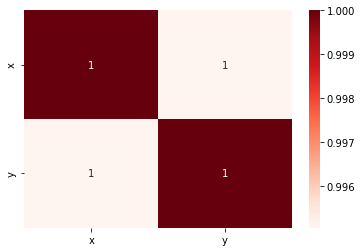

In [6]:
sns.heatmap(train.corr(), annot=True,cmap='Reds')

# 📊 Exploratory Data Analysis (EDA)

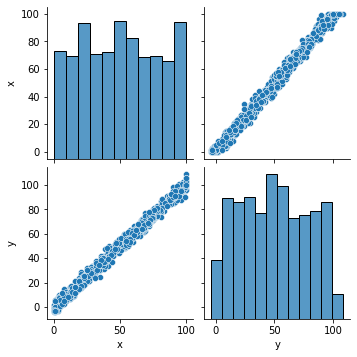

In [7]:
sns.pairplot(train)

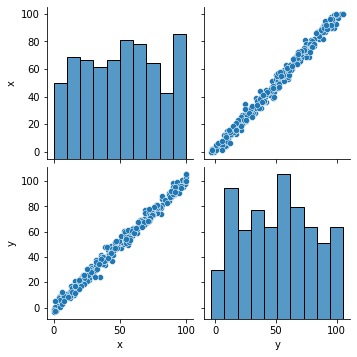

In [8]:
sns.pairplot(test)

# 🧱 **X and y arrays**

**Train**

In [9]:
X_train_raw = train.drop('y', axis=1)
y_train_raw = train['y']
y_train_raw = y_train_raw.to_frame()

In [10]:
X_train_raw

,x
0,24
1,50
2,15
3,38
4,87
...,...
995,71
996,46
997,55
998,62


In [11]:
y_train_raw

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
995,68.545888
996,47.334876
997,54.090637
998,63.297171


In [12]:
print('The size of dataset is:' ,train.shape)
print('The size of X is:' ,X_train_raw.shape)
print('The size of y is:' ,y_train_raw.shape)

The size of dataset is: (1000, 2)
The size of X is: (1000, 1)
The size of y is: (1000, 1)


**Test**

In [13]:
X_test_raw = test.drop('y', axis=1)
y_test_raw = test['y']
y_test_raw = y_test_raw.to_frame()

In [14]:
X_test_raw

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [15]:
y_test_raw

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


# Normalized Data

In [16]:
def norm(X):
    X_min = min(X)
    X_max = max(X)
    m=X.shape[0]
    X_norm = []

    for i in range(m):
        item = (X.iloc[i]-X_min) / (X_max-X_min)
        X_norm.append(item)

    X_norm = np.array(X_norm)
    X_norm = X_norm.reshape(m,1)
    return X_norm



**Train**

In [17]:
X_train_norm=norm(X_train_raw['x'])
X_train = X_train_norm
X_train = np.hstack([np.ones([X_train.shape[0],1]), X_train])
X_train.shape

(1000, 2)

In [18]:
y_train_norm=norm(y_train_raw['y'])
y_train = y_train_norm
y_train.shape

(1000, 1)

**Test**

In [19]:
X_test_norm=norm(X_test_raw['x'])
X_test = X_test_norm
X_test = np.hstack([np.ones([X_test.shape[0],1]), X_test])
X_test.shape

(300, 2)

In [20]:
y_test_norm = norm(y_test_raw['y'])
y_test = y_test_norm
y_test.shape

(300, 1)

# 📈 **Training a Linear Regression Model**

✔️ **Linear Regression**

**Functions**

In [21]:
def find_theta(x, y):
    m = x.shape[0]
    theta = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
    return theta

In [22]:
def find_h_theta(x, theta):
    h_theta = 0
    h_theta = np.dot(x, theta)
    return h_theta

In [23]:
def J_theta(x, y, h_theta):
    m=x.shape[0]
    J_theta = 0
    for i in range(m):
        J_theta += (1/2)*((h_theta[i] - y[i])**2)
    return J_theta

**Train**

In [24]:
theta = find_theta(X_train, y_train)
h_theta_train = find_h_theta(X_train, theta)
y_pred_train = h_theta_train
J_train = J_theta(X_train, y_train, h_theta_train)

In [25]:
J_train

array([0.32777373])

**Test**

In [26]:
h_theta_test = find_h_theta(X_test, theta)
y_pred_test = h_theta_test
J_test = J_theta(X_test, y_test, h_theta_test)

In [27]:
J_test

array([0.16776734])

# **Plots**

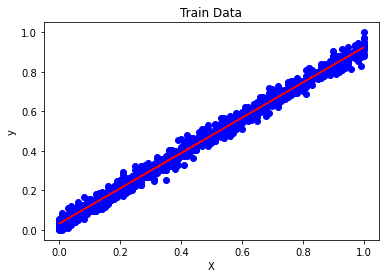

In [28]:
plt.plot(X_train_norm, y_train, "bo")
plt.plot(X_train_norm, y_pred_train, "r-")
plt.title("Train Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

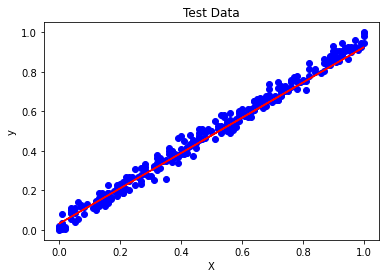

In [29]:
plt.plot(X_test_norm, y_test, "bo")
plt.plot(X_test_norm, y_pred_test, "r-")
plt.title("Test Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()